In [1]:
import pickle

import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

parsedLogsFolder = 'Enron/parsing/'
social = pickle.load(open(parsedLogsFolder + "social.pkl", "rb"))
recipientsPerEmail = pickle.load(open(parsedLogsFolder + "recipients.pkl", "rb"))

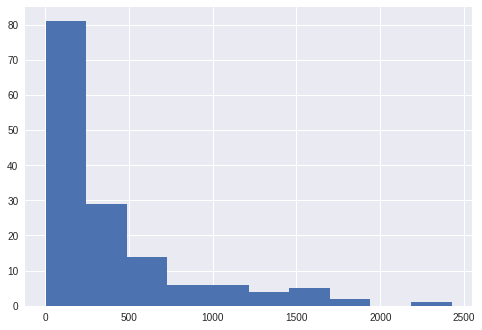

In [2]:
data = []
for user in social:
    data.append(user.get("numOfFriends"))

plt.hist(data)
plt.show()

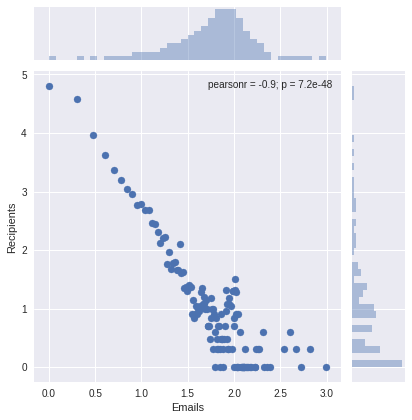

In [9]:
x, y = zip(*sorted(recipientsPerEmail.items(), key=lambda t: t[0]))
data = pd.DataFrame(dict(
    x=list(recipientsPerEmail.keys()),
    y=list(recipientsPerEmail.values())))
data['Emails'] = np.log10(data['x'])
data['Recipients'] = np.log10(data['y'])

sns.jointplot('Emails', 'Recipients', data=data, kind='scatter', marginal_kws=dict(bins=40))
plt.show()